Train an Autoencoder (composed of fully-connected layers) to learn a low-level gene expression
representation of the cells from the scRNA-Seq counts. Use and compare different latent
embedding (embedding learned by the bottleneck layer) sizes of 10 and 50. This is the size of the
output of the encoder, and the input to the decoder. (3 pts)


Hint 1: Use MSE loss. This assignment was tested with ~50 epochs. Your network may take more
or less to produce some good clusters.


Hint 2: For AE's, a good rule of thumb is to have the Encoder's architecture be symmetric to the
Decoder's. (Ex. Enc=1000->100->10, Dec=10->100->1000). There is no activation function needed
behind the input layer, latent embedding layer and the reconstruction (output) layer.


Hint 3: Normalization is not needed for this particular data.

In [1]:
import pandas as pd
import numpy as np 
import sklearn as sk
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer, Activation, Dropout
from tensorflow.keras.models import Model

In [39]:
counts = np.load('counts.npy')
counts.shape

(5000, 1000)

In [3]:
labels = np.loadtxt('labels.txt')
labels.shape

(5000,)

In [4]:
def trainAutoencoder(embedding):
    input = Input(shape=(1000,))
    encoded = Dense(1024, activation='relu')(input)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(16, activation='relu')(encoded)
    encoded_output = Dense(embedding)(encoded)
    decoded = Dense(16, activation='relu')(encoded_output)
    decoded = Dense(256, activation='relu')(decoded)
    decoded = Dense(1024, activation='relu')(decoded)
    output = Dense(1000)(decoded)
    autoencoder = Model(input, output)
    encoder = Model(input, encoded_output)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(counts, counts, epochs=50, batch_size=128, shuffle=True, validation_split=0.1)
    reconstruction = autoencoder.predict(counts)
    latent_space = encoder.predict(counts)
    return reconstruction, latent_space

In [5]:
latent_space_10, reconstruction_10 = trainAutoencoder(10)

Epoch 1/50
36/36 [==============================] - 1s 10ms/step - loss: 4.1931 - val_loss: 2.6349
Epoch 2/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6321 - val_loss: 2.6197
Epoch 3/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6278 - val_loss: 2.6195
Epoch 4/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6289 - val_loss: 2.6199
Epoch 5/50
36/36 [==============================] - 0s 9ms/step - loss: 2.6306 - val_loss: 2.6210
Epoch 6/50
36/36 [==============================] - 0s 9ms/step - loss: 2.6295 - val_loss: 2.6216
Epoch 7/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6313 - val_loss: 2.6196
Epoch 8/50
36/36 [==============================] - 0s 9ms/step - loss: 2.6307 - val_loss: 2.6233
Epoch 9/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6312 - val_loss: 2.6180
Epoch 10/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6249 - val_loss: 2.6150
Epoch 11/50
36/36 

In [6]:
latent_space_50, reconstruction_50 = trainAutoencoder(50)

Epoch 1/50
36/36 [==============================] - 1s 9ms/step - loss: 3.9118 - val_loss: 2.6509
Epoch 2/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6354 - val_loss: 2.6194
Epoch 3/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6281 - val_loss: 2.6189
Epoch 4/50
36/36 [==============================] - 0s 9ms/step - loss: 2.6319 - val_loss: 2.6166
Epoch 5/50
36/36 [==============================] - 0s 9ms/step - loss: 2.6267 - val_loss: 2.6187
Epoch 6/50
36/36 [==============================] - 0s 9ms/step - loss: 2.6201 - val_loss: 2.6122
Epoch 7/50
36/36 [==============================] - 0s 8ms/step - loss: 2.6299 - val_loss: 2.6025
Epoch 8/50
36/36 [==============================] - 0s 9ms/step - loss: 2.6035 - val_loss: 2.5953
Epoch 9/50
36/36 [==============================] - 0s 9ms/step - loss: 2.6019 - val_loss: 2.5894
Epoch 10/50
36/36 [==============================] - 0s 9ms/step - loss: 2.5969 - val_loss: 2.5866
Epoch 11/50
36/36 [

Report and compare the Mean Squared Error (MSE) between the reconstruction and original
data for each latent embedding size. How does the size of the latent space affect the
reconstruction MSE? (1 pt)

***The mean squared error between the reconstruction and the original for embedding sizes 10 and 50 is 2.568 and 2.560 respectively. It appears that the effect of increasing the latent space five-fold has a minimal effect on the reconstruction MSE. We may observe this because both the embedding sizes of 10 and 50 are similar in terms of being computationally efficient and capturing patterns in the data. By the virtue of the nature of the data, it may be that there are only a few patterns which need to be extracted in order to achieve optimal model performance, so even an embedding size of 10 is sufficient.***

Compare and report the plots of the original data with the plots of the reconstructions. How do
the PCA & t-SNE plots of the reconstructions compare with those of the original data? Here we
only consider latent embedding size of 10. (1 pt)

Note: Use labels.txt as labels when plotting.

***The PCA plots of the original and reconstructions show a clear beneficial effect of the autoencoder in clustering the data to achieve better separation. While the original has decent separation of the green label, the blue and orange label has significant overlap which makes the distinction questionable. However, there is a much clearer separation in the reconstructed PCA plot. The tSNE plots of the original and reconstructions show the same pattern. The original has questionable separation as evidenced by the overlap at the edges of the blue, green and orange clusters. However, the reconstructed tSNE plot has very clear margins for each cluster.***

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(counts)

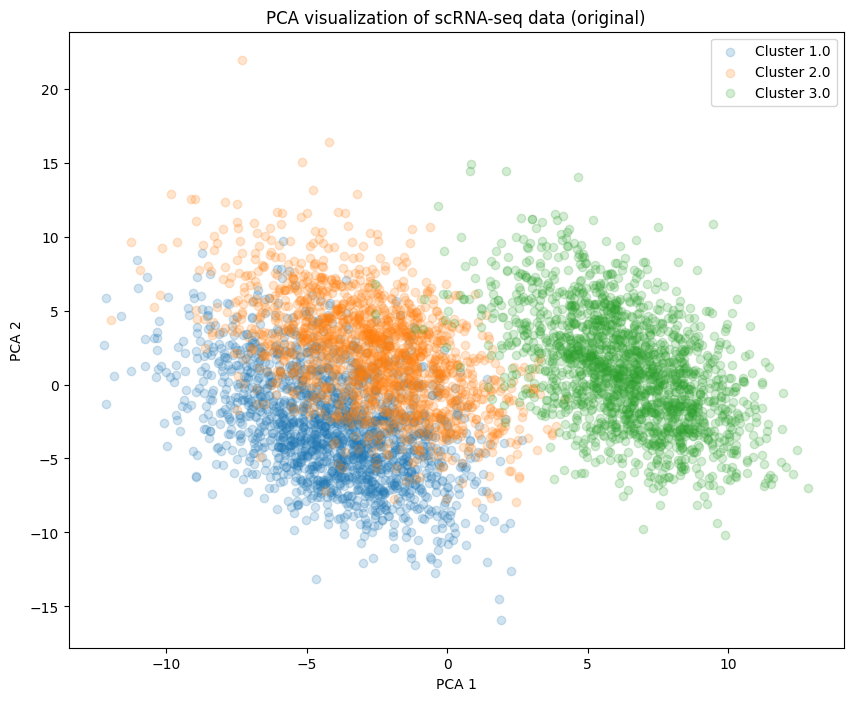

In [9]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('PCA visualization of scRNA-seq data (original)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [10]:
pca = PCA(n_components=2)
pca_recon = pca.fit_transform(reconstruction_10)

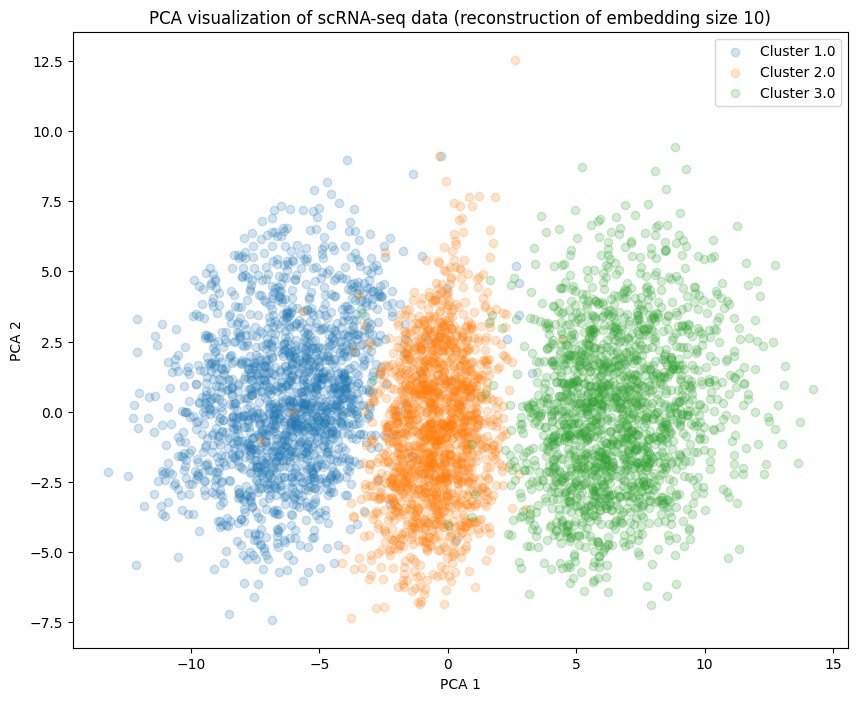

In [11]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_recon[idx, 0], pca_recon[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('PCA visualization of scRNA-seq data (reconstruction of embedding size 10)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [12]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(counts)

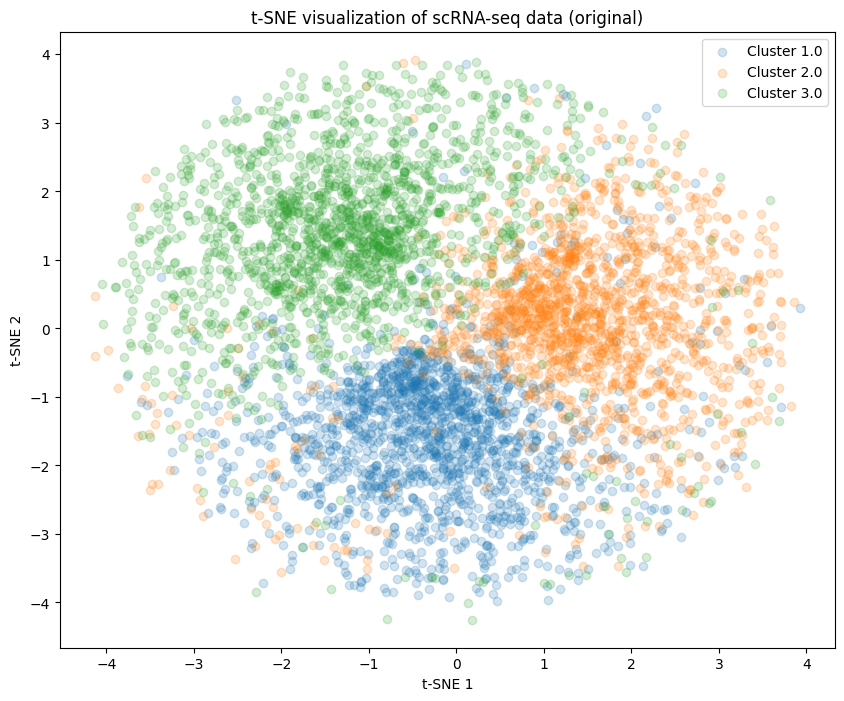

In [13]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('t-SNE visualization of scRNA-seq data (original)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

In [14]:
tsne = TSNE(n_components=2)
tsne_recon = tsne.fit_transform(reconstruction_10)

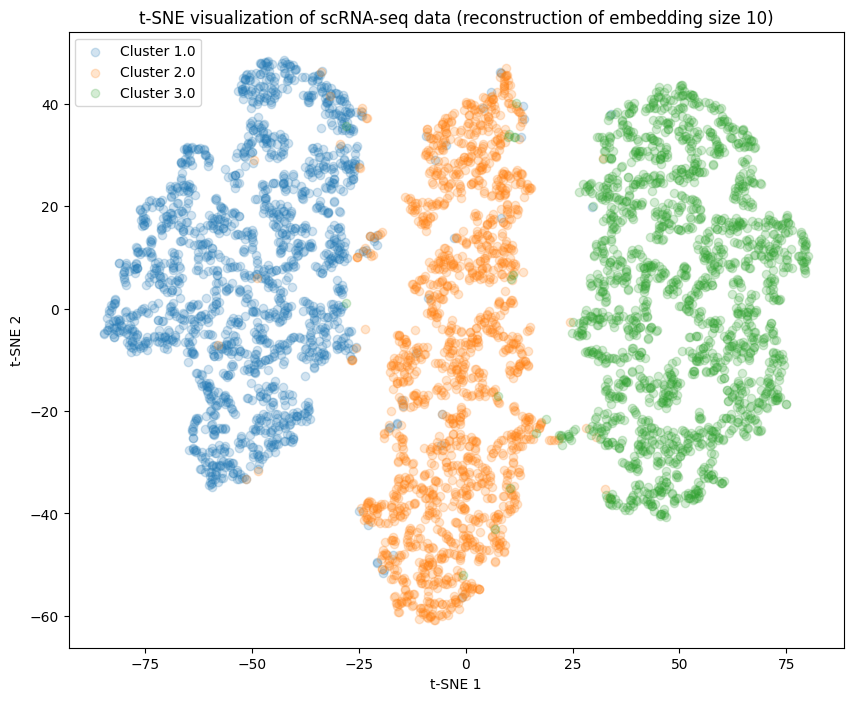

In [15]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_recon[idx, 0], tsne_recon[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('t-SNE visualization of scRNA-seq data (reconstruction of embedding size 10)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

Compare and report the plots of the original data and the plots of the latent vectors. How do the
various embedding sizes change the quality of clustering? Here we only consider latent
embedding size of 10. (1 pt)

Note: Use labels.txt as labels when plotting.

***For both the embedding sizes of 10 and 50, we observe decent clustering of the three types when plotting the first 2 dimensions of the latent vectors. It appears that smaller embedding sizes help achieve slightly better separation between the clusters as evidenced by the better margins and less overlap between the different clusters in the embedding size 10 plot compared to that of embedding size 50. A possible reason for this may be that a simpler embedding which captures few important patterns is better for clustering than a larger embedding size which may capture irrelevant features and perhaps noise.***

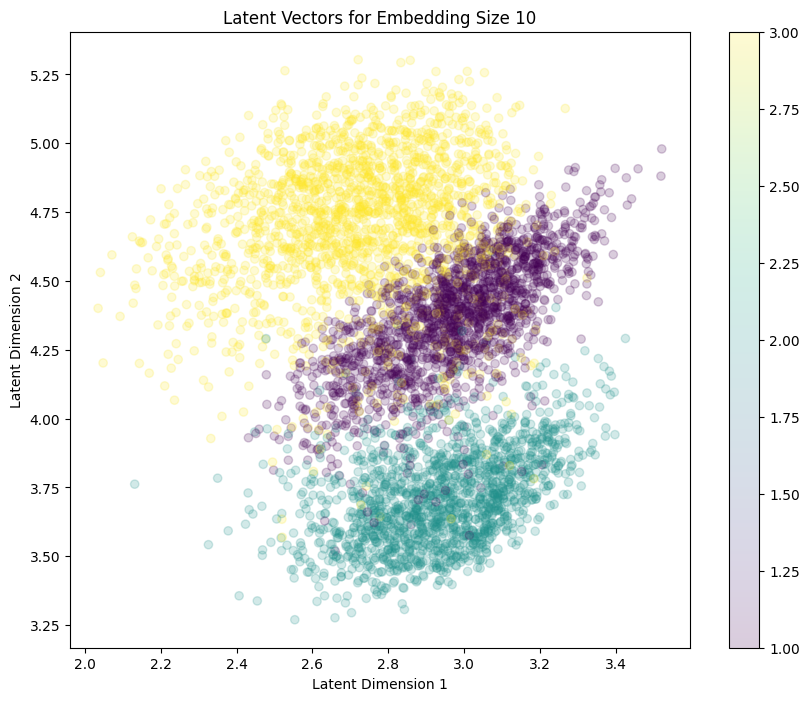

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(latent_space_10[:, 0], latent_space_10[:, 1], c=labels, cmap='viridis', alpha=0.2)
plt.colorbar()
plt.title('Latent Vectors for Embedding Size 10')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

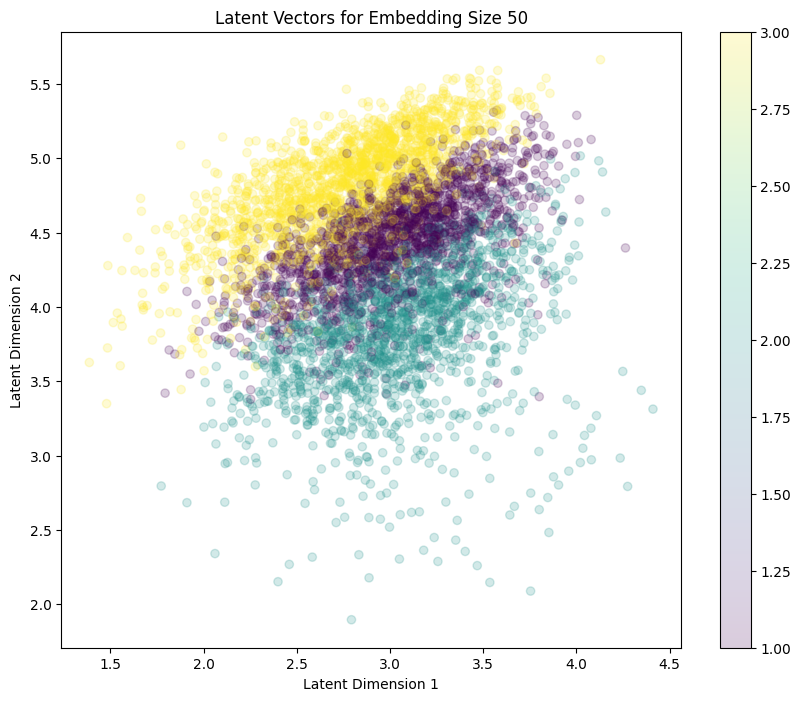

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(latent_space_50[:, 0], latent_space_50[:, 1], c=labels, cmap='viridis', alpha=0.2)
plt.colorbar()
plt.title('Latent Vectors for Embedding Size 50')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

Try to use the following loss to replace MSE when training your AE model. Compare the
reconstruction Mean Squared Error (MSE) with Q2 when latent embedding size of 10. Then plot
the PCA & t-SNE plots of the reconstructions and latent vectors with original data. What
clonclusion can you get? (2 pts)

Note: There should be 4 plots in total. Two PCAs (reconstruction v.s. origin, latent embedding
v.s. origin), two t-SNE (reconstruction v.s. origin, latent embedding v.s. origin)

***We can conclude that this non-zero MSE loss function is far superior for training the autoencoder compared to the regular MSE loss from before. This conclusion is supported by the superior loss value of only 0.29 compared to the 2.56 from the original loss function. We also have graphical evidence because the PCA and tSNE plots from the new reconstructions and latent vectors achieve far better separation of the clusters with clear margins and little overlap. Therefore, we now understand the the definition of loss is very important for creating an excellent autoencoder. We need to analyze the nature of the problem which we are addressing and construct a loss function which appropriately achieves our objective.***

In [18]:
def nonzero_mse_loss(y_true, y_pred):
    # Create a mask for non-zero elements
    mask = tf.cast(tf.math.not_equal(y_true, 0), tf.float32)
    nonzero_count = tf.reduce_sum(mask) # Count the number of non-zero elements
    # Apply the mask to filter out zero elements and Calculate squared difference
    nonzero_squared_diff = tf.square(y_true - y_pred*mask)
    # Calculate the mean of non-zero squared differences
    nonzero_mse = tf.reduce_sum(nonzero_squared_diff) / nonzero_count
    return nonzero_mse

In [23]:
def trainAutoencoder(embedding):
    input = Input(shape=(1000,))
    encoded = Dense(1024, activation='relu')(input)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(16, activation='relu')(encoded)
    encoded_output = Dense(embedding)(encoded)
    decoded = Dense(16, activation='relu')(encoded_output)
    decoded = Dense(256, activation='relu')(decoded)
    decoded = Dense(1024, activation='relu')(decoded)
    output = Dense(1000)(decoded)
    autoencoder = Model(input, output)
    encoder = Model(input, encoded_output)
    autoencoder.compile(optimizer='adam', loss=nonzero_mse_loss)
    autoencoder.fit(counts, counts, epochs=50, batch_size=128, shuffle=True, validation_split=0.1)
    reconstruction = autoencoder.predict(counts)
    latent_space = encoder.predict(counts)
    return reconstruction, latent_space

In [24]:
reconstruction, latent_space = trainAutoencoder(10)

Epoch 1/50
36/36 [==============================] - 1s 11ms/step - loss: 4.4202 - val_loss: 0.4697
Epoch 2/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3737 - val_loss: 0.3442
Epoch 3/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3423 - val_loss: 0.3343
Epoch 4/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3342 - val_loss: 0.3462
Epoch 5/50
36/36 [==============================] - 0s 9ms/step - loss: 0.3315 - val_loss: 0.3258
Epoch 6/50
36/36 [==============================] - 0s 9ms/step - loss: 0.3238 - val_loss: 0.3207
Epoch 7/50
36/36 [==============================] - 0s 9ms/step - loss: 0.3211 - val_loss: 0.3192
Epoch 8/50
36/36 [==============================] - 0s 9ms/step - loss: 0.3196 - val_loss: 0.3199
Epoch 9/50
36/36 [==============================] - 0s 9ms/step - loss: 0.3191 - val_loss: 0.3184
Epoch 10/50
36/36 [==============================] - 0s 9ms/step - loss: 0.3186 - val_loss: 0.3167
Epoch 11/50
36/36 

In [25]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(counts)

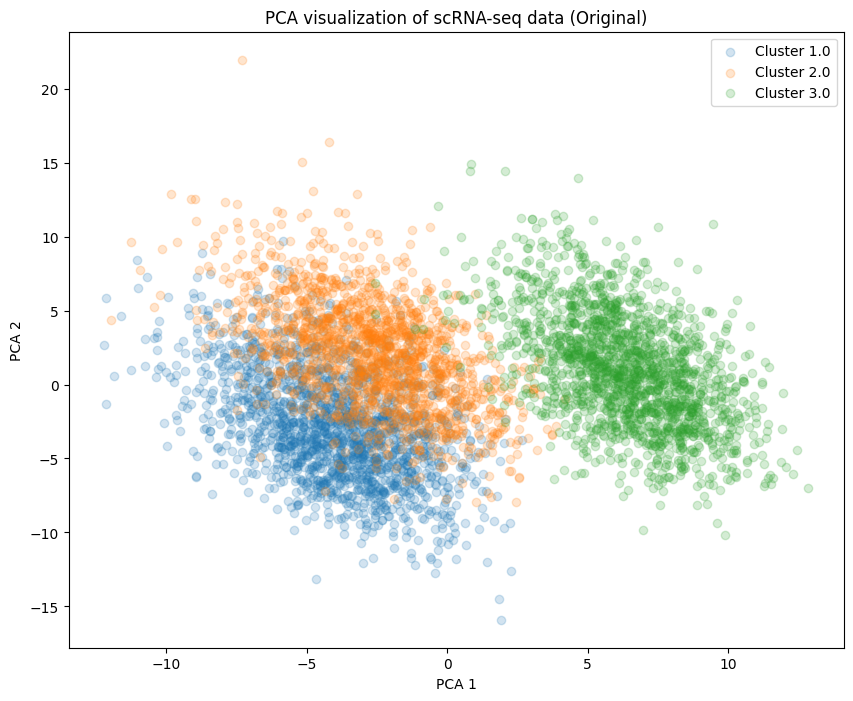

In [26]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('PCA visualization of scRNA-seq data (Original)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [27]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(latent_space)

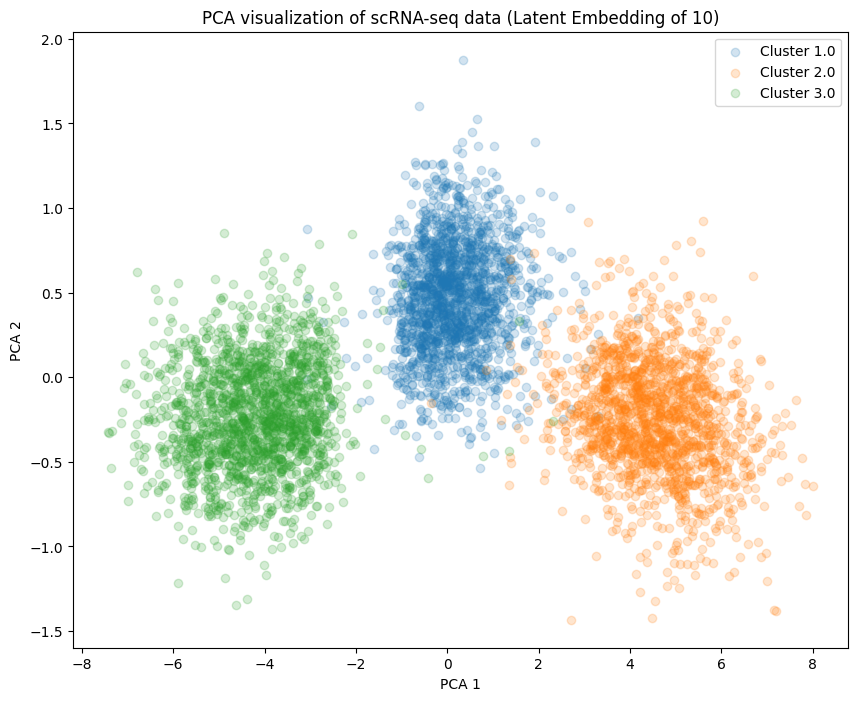

In [28]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('PCA visualization of scRNA-seq data (Latent Embedding of 10)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [29]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(reconstruction)

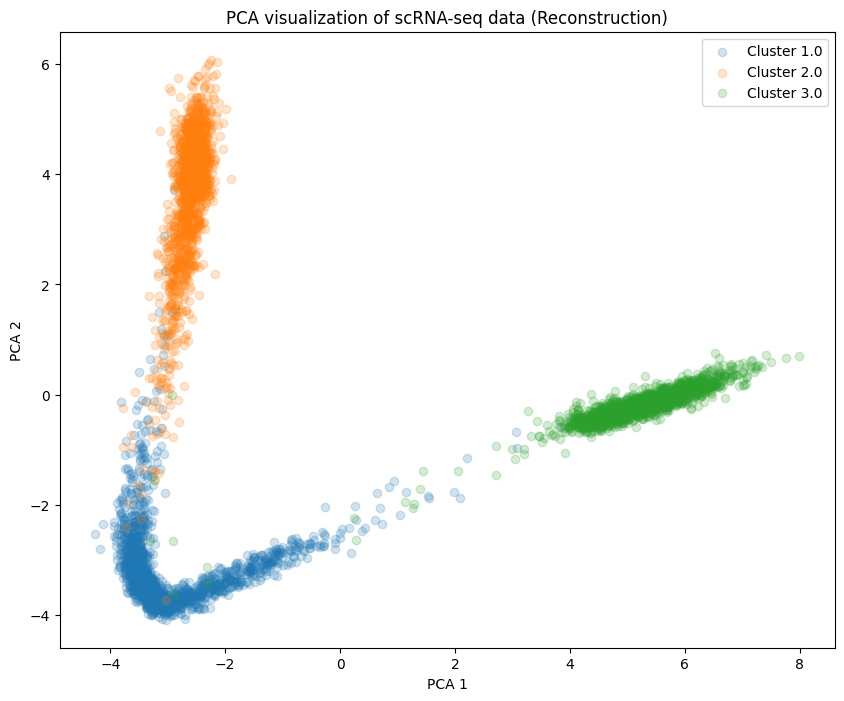

In [30]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('PCA visualization of scRNA-seq data (Reconstruction)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [31]:
tsne = TSNE(n_components=2)
tsne_recon = tsne.fit_transform(counts)

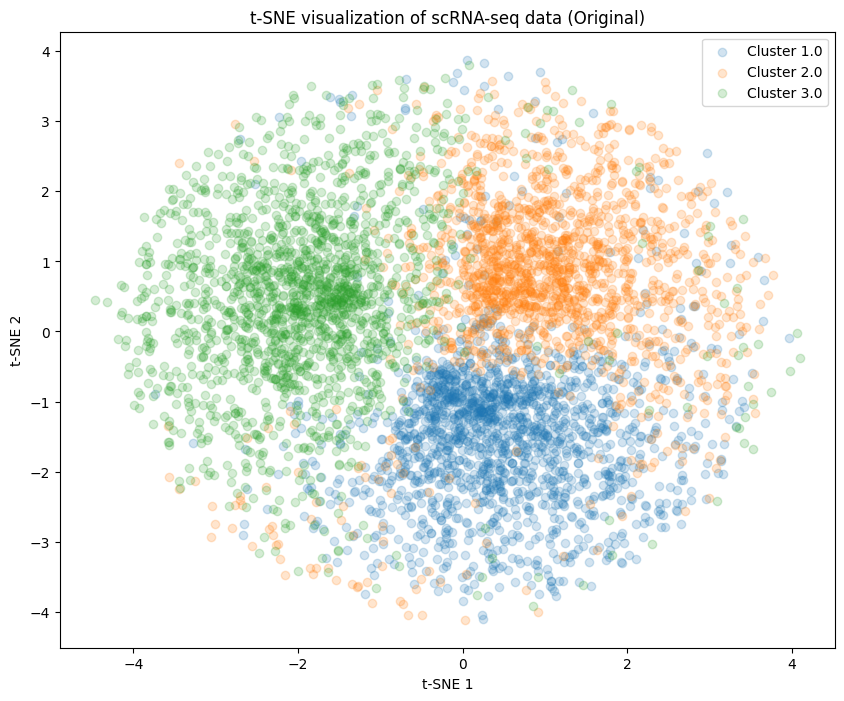

In [32]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_recon[idx, 0], tsne_recon[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('t-SNE visualization of scRNA-seq data (Original)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

In [33]:
tsne = TSNE(n_components=2)
tsne_recon = tsne.fit_transform(latent_space)

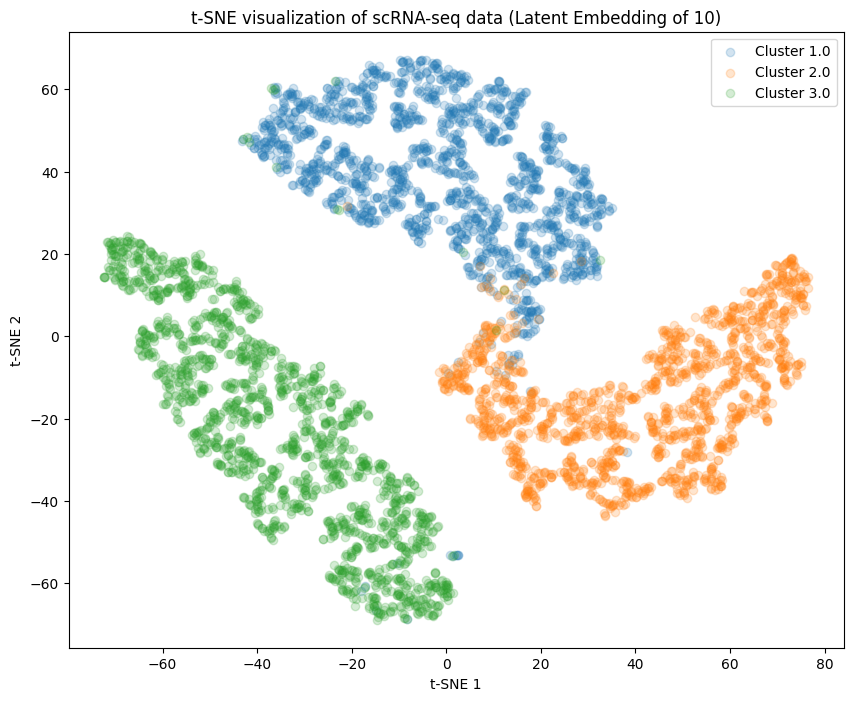

In [34]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_recon[idx, 0], tsne_recon[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('t-SNE visualization of scRNA-seq data (Latent Embedding of 10)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

In [35]:
tsne = TSNE(n_components=2)
tsne_recon = tsne.fit_transform(reconstruction)

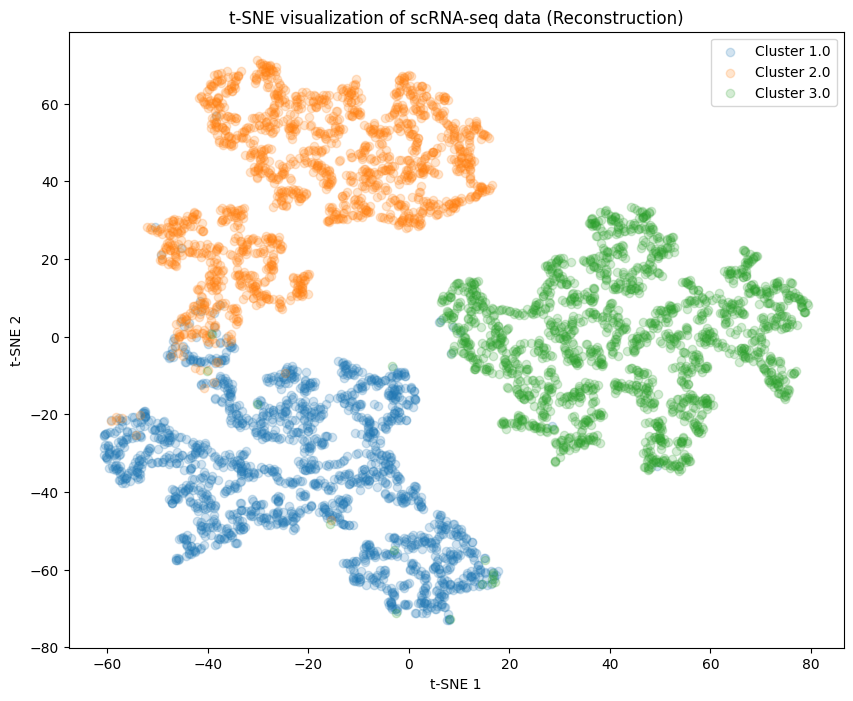

In [36]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(labels):
    idx = labels == cluster
    plt.scatter(tsne_recon[idx, 0], tsne_recon[idx, 1], label=f'Cluster {cluster}', alpha=0.2)
plt.title('t-SNE visualization of scRNA-seq data (Reconstruction)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()